<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Bitcoin_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn
!pip install fbprophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#gold = pd.read_csv('Gold Futures Historical Data (3).csv')
#usd = pd.read_csv('USD.csv')
cryptos = pd.read_csv('btc2.csv')
#silver = pd.read_csv('Gold Futures Historical Data (3).csv')

In [ ]:
cryptos

,ds,y,btc volume,btc market cap,prev 7 vol,prev 7 cap,eth price,eth volume,eth cap,bitcash price,bth volume,bth cap,Link price,Link volume,Link cap,xrp price,xrp volume,xrp cap
0,4/29/2013,144.54,0.000000e+00,1.603769e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
1,4/30/2013,139.00,0.000000e+00,1.542813e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
2,5/1/2013,116.99,0.000000e+00,1.298955e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
3,5/2/2013,105.21,0.000000e+00,1.168517e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
4,5/3/2013,97.75,0.000000e+00,1.085995e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,2.731156e+10,2.211810e+11,2.162105e+10,2.127618e+11,477.05,1.886276e+10,5.363393e+10,292.72,1.755312e+09,5.417103e+09,16.12,1.602446e+09,5.642522e+09,0.30,1.730740e+09,1.330478e+10
2659,9/2/2020,11414.03,2.803741e+10,2.109098e+11,2.176534e+10,2.143673e+11,440.04,1.969185e+10,4.947879e+10,264.12,2.049398e+09,4.888043e+09,14.90,1.440208e+09,5.214089e+09,0.28,1.985414e+09,1.244386e+10
2660,9/3/2020,10245.30,3.192726e+10,1.893221e+11,2.256117e+10,2.141814e+11,385.67,1.962285e+10,4.337072e+10,216.06,1.891348e+09,3.998852e+09,12.02,1.702200e+09,4.205837e+09,0.25,1.847290e+09,1.109889e+10
2661,9/4/2020,10511.81,2.996513e+10,1.942558e+11,2.380214e+10,2.113457e+11,388.24,1.674711e+10,4.366502e+10,231.87,2.130928e+09,4.291715e+09,12.49,1.796656e+09,4.372503e+09,0.26,1.924234e+09,1.151759e+10


In [ ]:
cryptos.dropna(how='all',inplace=True)
cryptos.dropna(axis=1, how='all',inplace=True)
cryptos

,ds,y,btc volume,btc market cap,prev 7 vol,prev 7 cap,eth price,eth volume,eth cap,bitcash price,bth volume,bth cap,Link price,Link volume,Link cap,xrp price,xrp volume,xrp cap
0,4/29/2013,144.54,0.000000e+00,1.603769e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
1,4/30/2013,139.00,0.000000e+00,1.542813e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
2,5/1/2013,116.99,0.000000e+00,1.298955e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
3,5/2/2013,105.21,0.000000e+00,1.168517e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
4,5/3/2013,97.75,0.000000e+00,1.085995e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,2.731156e+10,2.211810e+11,2.162105e+10,2.127618e+11,477.05,1.886276e+10,5.363393e+10,292.72,1.755312e+09,5.417103e+09,16.12,1.602446e+09,5.642522e+09,0.30,1.730740e+09,1.330478e+10
2659,9/2/2020,11414.03,2.803741e+10,2.109098e+11,2.176534e+10,2.143673e+11,440.04,1.969185e+10,4.947879e+10,264.12,2.049398e+09,4.888043e+09,14.90,1.440208e+09,5.214089e+09,0.28,1.985414e+09,1.244386e+10
2660,9/3/2020,10245.30,3.192726e+10,1.893221e+11,2.256117e+10,2.141814e+11,385.67,1.962285e+10,4.337072e+10,216.06,1.891348e+09,3.998852e+09,12.02,1.702200e+09,4.205837e+09,0.25,1.847290e+09,1.109889e+10
2661,9/4/2020,10511.81,2.996513e+10,1.942558e+11,2.380214e+10,2.113457e+11,388.24,1.674711e+10,4.366502e+10,231.87,2.130928e+09,4.291715e+09,12.49,1.796656e+09,4.372503e+09,0.26,1.924234e+09,1.151759e+10


In [ ]:
cryptos

,ds,y,btc volume,btc market cap,prev 7 vol,prev 7 cap,eth price,eth volume,eth cap,bitcash price,bth volume,bth cap,Link price,Link volume,Link cap,xrp price,xrp volume,xrp cap
0,4/29/2013,144.54,0.000000e+00,1.603769e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
1,4/30/2013,139.00,0.000000e+00,1.542813e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
2,5/1/2013,116.99,0.000000e+00,1.298955e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
3,5/2/2013,105.21,0.000000e+00,1.168517e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
4,5/3/2013,97.75,0.000000e+00,1.085995e+09,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,2.731156e+10,2.211810e+11,2.162105e+10,2.127618e+11,477.05,1.886276e+10,5.363393e+10,292.72,1.755312e+09,5.417103e+09,16.12,1.602446e+09,5.642522e+09,0.30,1.730740e+09,1.330478e+10
2659,9/2/2020,11414.03,2.803741e+10,2.109098e+11,2.176534e+10,2.143673e+11,440.04,1.969185e+10,4.947879e+10,264.12,2.049398e+09,4.888043e+09,14.90,1.440208e+09,5.214089e+09,0.28,1.985414e+09,1.244386e+10
2660,9/3/2020,10245.30,3.192726e+10,1.893221e+11,2.256117e+10,2.141814e+11,385.67,1.962285e+10,4.337072e+10,216.06,1.891348e+09,3.998852e+09,12.02,1.702200e+09,4.205837e+09,0.25,1.847290e+09,1.109889e+10
2661,9/4/2020,10511.81,2.996513e+10,1.942558e+11,2.380214e+10,2.113457e+11,388.24,1.674711e+10,4.366502e+10,231.87,2.130928e+09,4.291715e+09,12.49,1.796656e+09,4.372503e+09,0.26,1.924234e+09,1.151759e+10


In [ ]:
# Select only the important features i.e. the date and price
#usd = usd[["ds","y", "Inflation"]]
cryptos = cryptos[['ds', 'y','prev 7 vol', 'bitcash price', 'Link price', 'bth volume', "xrp price"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting

cryptos.head(5)

,ds,y,prev 7 vol,bitcash price,Link price,bth volume,xrp price
0,4/29/2013,144.54,0.0,0.0,0.0,0.0,0.0
1,4/30/2013,139.00,0.0,0.0,0.0,0.0,0.0
2,5/1/2013,116.99,0.0,0.0,0.0,0.0,0.0
3,5/2/2013,105.21,0.0,0.0,0.0,0.0,0.0
4,5/3/2013,97.75,0.0,0.0,0.0,0.0,0.0


In [ ]:
log_price = np.log(cryptos['y'])
cryptos['btc_log_price'] = log_price
cryptos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,prev 7 vol,bitcash price,Link price,bth volume,xrp price,btc_log_price
0,4/29/2013,144.54,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.973556
1,4/30/2013,139.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.934474
2,5/1/2013,116.99,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.762088
3,5/2/2013,105.21,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.655958
4,5/3/2013,97.75,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.582413
...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,2.162105e+10,292.72,16.12,1.755312e+09,0.30,9.390199
2659,9/2/2020,11414.03,2.176534e+10,264.12,14.90,2.049398e+09,0.28,9.342599
2660,9/3/2020,10245.30,2.256117e+10,216.06,12.02,1.891348e+09,0.25,9.234574
2661,9/4/2020,10511.81,2.380214e+10,231.87,12.49,2.130928e+09,0.26,9.260255


In [ ]:
from sklearn.preprocessing import StandardScaler
targets = cryptos['y']
inputs = cryptos.drop(['y', 'ds'], axis=1)

In [ ]:
inputs

,prev 7 vol,bitcash price,Link price,bth volume,xrp price,btc_log_price
0,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.973556
1,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.934474
2,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.762088
3,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.655958
4,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.582413
...,...,...,...,...,...,...
2658,2.162105e+10,292.72,16.12,1.755312e+09,0.30,9.390199
2659,2.176534e+10,264.12,14.90,2.049398e+09,0.28,9.342599
2660,2.256117e+10,216.06,12.02,1.891348e+09,0.25,9.234574
2661,2.380214e+10,231.87,12.49,2.130928e+09,0.26,9.260255


In [ ]:
inputs_scaled = scaler.transform(inputs)

NameError: ignored

In [ ]:
inputs_scaled = pd.DataFrame(inputs_scaled)
inputs_scaled

NameError: ignored

In [ ]:
scaled = pd.DataFrame()
scaled['ds'] = cryptos['ds']
scaled['y'] = cryptos['y']
scaled['prev 7 vol'] = inputs_scaled[0]
scaled['prev 7 cap'] = inputs_scaled[1]
scaled['eth price'] = inputs_scaled[2]
scaled['bitcash price'] = inputs_scaled[3]
scaled['Link price'] = inputs_scaled[4]
scaled['eth volume'] = inputs_scaled[5]
scaled['eth cap'] = inputs_scaled[6]
scaled['bth volume'] = inputs_scaled[7]
scaled['bth cap'] = inputs_scaled[8]
scaled['Link volume'] = inputs_scaled[9]
scaled['Link cap'] = inputs_scaled[10]
scaled['btc_log+price'] = inputs_scaled[11]

In [ ]:
scaled

,ds,y,prev 7 vol,prev 7 cap,eth price,bitcash price,Link price,eth volume,eth cap,bth volume,bth cap,Link volume,Link cap,btc_log+price
0,4/29/2013,144.54,-0.596361,-0.886485,-0.679716,-0.535767,-0.387167,-0.564295,-0.694192,-0.476888,-0.542503,-0.268789,-0.387186,-1.532801
1,4/30/2013,139.00,-0.596361,-0.886485,-0.679716,-0.535767,-0.387167,-0.564295,-0.694192,-0.476888,-0.542503,-0.268789,-0.387186,-1.558678
2,5/1/2013,116.99,-0.596361,-0.886485,-0.679716,-0.535767,-0.387167,-0.564295,-0.694192,-0.476888,-0.542503,-0.268789,-0.387186,-1.672815
3,5/2/2013,105.21,-0.596361,-0.886485,-0.679716,-0.535767,-0.387167,-0.564295,-0.694192,-0.476888,-0.542503,-0.268789,-0.387186,-1.743084
4,5/3/2013,97.75,-0.596361,-0.886485,-0.679716,-0.535767,-0.387167,-0.564295,-0.694192,-0.476888,-0.542503,-0.268789,-0.387186,-1.791778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,1.431932,2.102335,1.555801,0.133717,7.605044,3.440797,1.843763,0.840445,0.186964,6.232530,7.605735,1.391470
2659,9/2/2020,11414.03,1.445468,2.124888,1.382367,0.068306,7.000175,3.616836,1.647142,1.061152,0.115721,5.574310,6.998837,1.359953
2660,9/3/2020,10245.30,1.520124,2.122278,1.127582,-0.041613,5.572286,3.602184,1.358109,0.942538,-0.004017,6.637244,5.570597,1.288430
2661,9/4/2020,10511.81,1.636542,2.082441,1.139626,-0.005454,5.805309,2.991584,1.372035,1.122339,0.035420,7.020462,5.806688,1.305433


In [ ]:
#gold_train, gold_test = train_test_split(gold, test_size=0.15, shuffle=False)
#silver_train, silver_test = train_test_split(silver, test_size=0.15, shuffle=False)
#usd_train, usd_test = train_test_split(usd, test_size=0.15, shuffle=False)
crypto_train,crypto_test = train_test_split(cryptos, test_size=0.15, shuffle=False)

In [ ]:
crypto_train

,ds,y,prev 7 vol,bitcash price,Link price,bth volume,xrp price,btc_log_price
0,4/29/2013,144.54,0.000000e+00,0.00,0.00,0.0,0.00,4.973556
1,4/30/2013,139.00,0.000000e+00,0.00,0.00,0.0,0.00,4.934474
2,5/1/2013,116.99,0.000000e+00,0.00,0.00,0.0,0.00,4.762088
3,5/2/2013,105.21,0.000000e+00,0.00,0.00,0.0,0.00,4.655958
4,5/3/2013,97.75,0.000000e+00,0.00,0.00,0.0,0.00,4.582413
...,...,...,...,...,...,...,...,...
2125,3/18/2019,4032.51,9.622538e+09,162.49,0.48,635931669.0,0.32,8.302144
2126,3/19/2019,4071.19,9.554117e+09,162.43,0.49,430154285.0,0.32,8.311691
2127,3/20/2019,4087.48,9.487693e+09,160.53,0.49,394747561.0,0.32,8.315684
2128,3/21/2019,4029.33,9.588655e+09,154.77,0.46,488749472.0,0.31,8.301355


In [ ]:
scaled_test

,ds,y,prev 7 vol,prev 7 cap,eth price,bitcash price,Link price,eth volume,eth cap,bth volume,bth cap,Link volume,Link cap,btc_log+price
2130,3/23/2019,4035.83,0.305963,0.113642,-0.031906,-0.152881,-0.159101,0.377713,-0.004970,-0.087927,-0.143733,-0.258669,-0.157592,0.671611
2131,3/24/2019,4022.17,0.302247,0.113297,-0.037764,-0.156243,-0.159101,0.341676,-0.011128,-0.176559,-0.147204,-0.256212,-0.160903,0.669366
2132,3/25/2019,3963.07,0.314619,0.113299,-0.046948,-0.166123,-0.149185,0.387044,-0.020794,-0.129587,-0.157454,-0.234435,-0.150992,0.659565
2133,3/26/2019,3985.08,0.324173,0.110954,-0.044933,-0.166535,-0.159101,0.391026,-0.018566,-0.140408,-0.157847,-0.243506,-0.157336,0.663232
2134,3/27/2019,4087.07,0.342436,0.108017,-0.019019,-0.139684,-0.139269,0.545807,0.009096,-0.051519,-0.129819,-0.243484,-0.139353,0.679964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,1.431932,2.102335,1.555801,0.133717,7.605044,3.440797,1.843763,0.840445,0.186964,6.232530,7.605735,1.391470
2659,9/2/2020,11414.03,1.445468,2.124888,1.382367,0.068306,7.000175,3.616836,1.647142,1.061152,0.115721,5.574310,6.998837,1.359953
2660,9/3/2020,10245.30,1.520124,2.122278,1.127582,-0.041613,5.572286,3.602184,1.358109,0.942538,-0.004017,6.637244,5.570597,1.288430
2661,9/4/2020,10511.81,1.636542,2.082441,1.139626,-0.005454,5.805309,2.991584,1.372035,1.122339,0.035420,7.020462,5.806688,1.305433


In [ ]:
cryptos.describe()

,y,prev 7 vol,bitcash price,Link price,bth volume,xrp price,btc_log_price
count,2663.00000,2.663000e+03,2663.000000,2663.000000,2.663000e+03,2663.000000,2663.000000
mean,3657.61439,6.357048e+09,234.254457,0.780901,6.354408e+08,0.187157,7.288607
std,4026.15474,1.066173e+10,437.314135,2.017343,1.332724e+09,0.300137,1.510623
min,68.43000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,4.225811
25%,416.35500,2.791551e+07,0.000000,0.000000,0.000000e+00,0.010000,6.031538
50%,955.85000,1.565393e+08,0.000000,0.000000,0.000000e+00,0.020000,6.862601
75%,7117.00500,7.261019e+09,301.870000,0.470000,7.760265e+08,0.290000,8.870242
max,19497.40000,5.320358e+10,3923.070000,19.100000,2.957459e+10,3.380000,9.878036


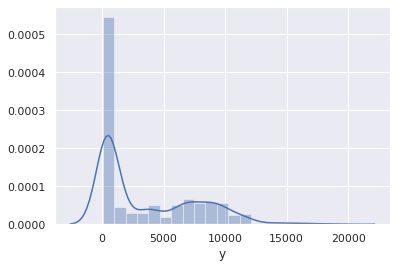

In [ ]:
sns.distplot(cryptos['y'])

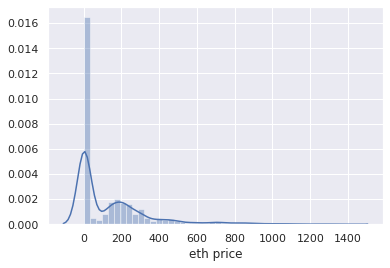

In [ ]:
sns.distplot(cryptos['eth price'])

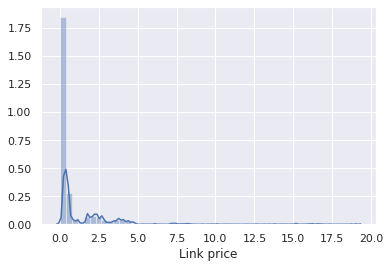

In [ ]:
sns.distplot(cryptos['Link price'])

In [ ]:
q = cryptos['y'].quantile(0.99)
data_1 = cryptos[cryptos['y']<q]
data_1.describe(include='all')

,ds,y,prev 7 vol,prev 7 cap,eth price,eth volume,eth cap,bitcash price,Link price,bth volume,bth cap,Link volume,Link cap,xrp price,xrp volume,xrp cap,btc_log_price
count,2636,2636.000000,2.636000e+03,2.636000e+03,2636.000000,2.636000e+03,2.636000e+03,2636.000000,2636.000000,2.636000e+03,2.636000e+03,2.636000e+03,2.636000e+03,2636.000000,2.636000e+03,2.636000e+03,2636.000000
unique,2636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,9/23/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3525.600539,6.277061e+09,6.108865e+10,138.504048,2.644470e+09,1.404491e+10,212.726138,0.783194,6.165627e+08,3.666169e+09,6.679508e+07,2.741315e+08,0.174886,4.910360e+08,6.994905e+09,7.263799
std,NaN,3825.888421,1.068387e+10,6.864916e+10,203.263170,4.728372e+09,2.020448e+10,377.524740,2.027233,1.307980e+09,6.430555e+09,2.477264e+08,7.095345e+08,0.254169,8.738194e+08,1.009599e+10,1.498191
min,NaN,68.430000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.225811
25%,NaN,414.067500,2.765349e+07,5.736851e+09,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.010000,3.466600e+05,2.078323e+08,6.026029
50%,NaN,918.545000,1.453083e+08,1.372788e+10,12.945000,2.864270e+07,1.098808e+09,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.020000,2.773955e+06,4.164462e+08,6.822790
75%,NaN,6937.310000,6.967065e+09,1.197386e+11,217.075000,2.709972e+09,2.274232e+10,294.467500,0.470000,6.899243e+08,5.259678e+09,6.916368e+06,1.631465e+08,0.280000,7.188770e+08,1.200660e+10,8.844669


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cryptos[['prev 7 vol', 'bitcash price', 'Link price', 'bth volume', "xrp price"]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [ ]:
vif

,VIF,features
0,5.097554,prev 7 vol
1,5.704040,bitcash price
2,1.943834,Link price
3,3.679640,bth volume
4,5.930353,xrp price


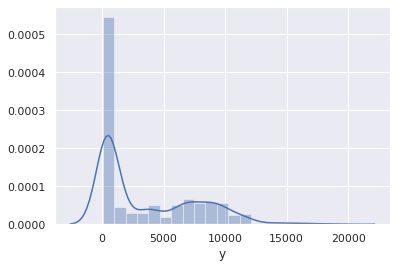

In [ ]:
sns.distplot(cryptos['y'])

In [ ]:
from fbprophet import Prophet
btc_model = Prophet(daily_seasonality = True) # the Prophet class (model)
btc_model.add_regressor('Link price')
btc_model.add_regressor('bitcash price')
btc_model.add_regressor('bth volume')
btc_model.add_regressor('xrp price')
btc_model.add_regressor('prev 7 vol')

btc_model.fit(crypto_train) # fit the model using all data

In [ ]:
future = btc_model.make_future_dataframe(periods=50) #we need to specify the number of days in future

In [ ]:
future

,ds
0,2013-04-29
1,2013-04-30
2,2013-05-01
3,2013-05-02
4,2013-05-03
...,...
2308,2019-09-17
2309,2019-09-18
2310,2019-09-19
2311,2019-09-20


In [ ]:
vif

,VIF,features
0,5.097554,prev 7 vol
1,5.704040,bitcash price
2,1.943834,Link price
3,3.679640,bth volume
4,5.930353,xrp price


In [ ]:
cryptos

,ds,y,prev 7 vol,bitcash price,Link price,bth volume,xrp price,btc_log_price,pred_date,predictions,results
0,4/29/2013,144.54,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.973556,2013-04-29,-278.186487,422.726487
1,4/30/2013,139.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.934474,2013-04-30,-282.022132,421.022132
2,5/1/2013,116.99,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.762088,2013-05-01,-283.650862,400.640862
3,5/2/2013,105.21,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.655958,2013-05-02,-265.070214,370.280214
4,5/3/2013,97.75,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.582413,2013-05-03,-270.309954,368.059954
...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,2.162105e+10,292.72,16.12,1.755312e+09,0.30,9.390199,2020-09-01,11042.779813,927.700187
2659,9/2/2020,11414.03,2.176534e+10,264.12,14.90,2.049398e+09,0.28,9.342599,2020-09-02,10348.723104,1065.306896
2660,9/3/2020,10245.30,2.256117e+10,216.06,12.02,1.891348e+09,0.25,9.234574,2020-09-03,9097.987364,1147.312636
2661,9/4/2020,10511.81,2.380214e+10,231.87,12.49,2.130928e+09,0.26,9.260255,2020-09-04,9538.142325,973.667675


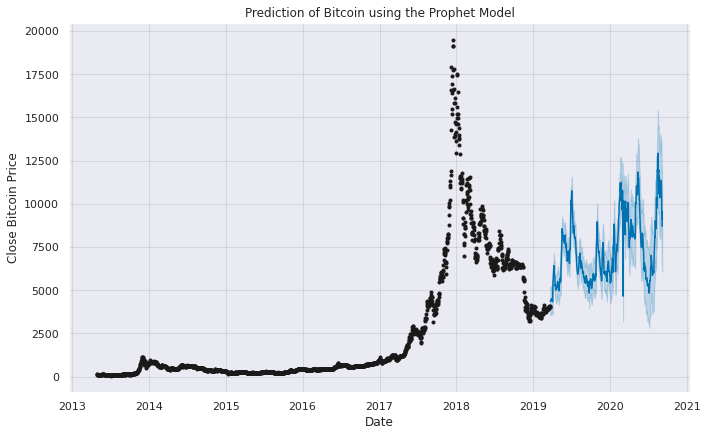

In [ ]:
#future['Change %'] = gold['Change %'].mean()
prediction = btc_model.predict(crypto_test)
btc_model.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()

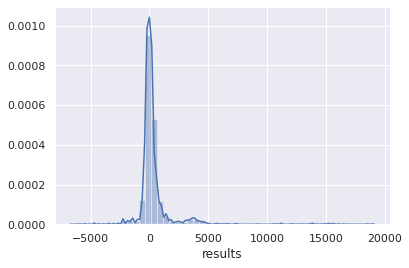

In [ ]:
sns.distplot(cryptos['results'])

In [ ]:
cryptos['pred_date'] = prediction['ds']
cryptos['predictions'] = prediction['yhat']

cryptos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,prev 7 vol,bitcash price,Link price,bth volume,xrp price,btc_log_price,pred_date,predictions,results
0,4/29/2013,144.54,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.973556,2013-04-29,-278.186487,839.815474
1,4/30/2013,139.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.934474,2013-04-30,-282.022132,763.939217
2,5/1/2013,116.99,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.762088,2013-05-01,-283.650862,491.493114
3,5/2/2013,105.21,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.655958,2013-05-02,-265.070214,331.349925
4,5/3/2013,97.75,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.582413,2013-05-03,-270.309954,204.033061
...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,2.162105e+10,292.72,16.12,1.755312e+09,0.30,9.390199,2020-09-01,11042.779813,-8241.525008
2659,9/2/2020,11414.03,2.176534e+10,264.12,14.90,2.049398e+09,0.28,9.342599,2020-09-02,10348.723104,-7567.889834
2660,9/3/2020,10245.30,2.256117e+10,216.06,12.02,1.891348e+09,0.25,9.234574,2020-09-03,9097.987364,-5791.249774
2661,9/4/2020,10511.81,2.380214e+10,231.87,12.49,2.130928e+09,0.26,9.260255,2020-09-04,9538.142325,-5841.349380


#initial training results of model including S2F, xrp, eth, usd, inflation, silver, gold


In [ ]:
cryptos['results'] = cryptos['y'].sub(cryptos['predictions'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



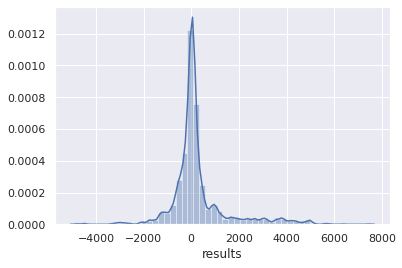

In [ ]:
sns.distplot(cryptos['results'])

In [ ]:
cryptos

,ds,y,prev 7 vol,bitcash price,Link price,bth volume,xrp price,btc_log_price,pred_date,predictions,results
0,4/29/2013,144.54,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.973556,2013-04-29,-278.186487,422.726487
1,4/30/2013,139.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.934474,2013-04-30,-282.022132,421.022132
2,5/1/2013,116.99,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.762088,2013-05-01,-283.650862,400.640862
3,5/2/2013,105.21,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.655958,2013-05-02,-265.070214,370.280214
4,5/3/2013,97.75,0.000000e+00,0.00,0.00,0.000000e+00,0.00,4.582413,2013-05-03,-270.309954,368.059954
...,...,...,...,...,...,...,...,...,...,...,...
2658,9/1/2020,11970.48,2.162105e+10,292.72,16.12,1.755312e+09,0.30,9.390199,2020-09-01,11042.779813,927.700187
2659,9/2/2020,11414.03,2.176534e+10,264.12,14.90,2.049398e+09,0.28,9.342599,2020-09-02,10348.723104,1065.306896
2660,9/3/2020,10245.30,2.256117e+10,216.06,12.02,1.891348e+09,0.25,9.234574,2020-09-03,9097.987364,1147.312636
2661,9/4/2020,10511.81,2.380214e+10,231.87,12.49,2.130928e+09,0.26,9.260255,2020-09-04,9538.142325,973.667675


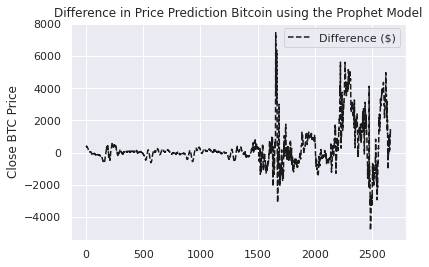

In [ ]:
results = cryptos['results']
plt.figure(); results.plot(style='k--', label='Difference ($)'); plt.legend()
plt.title("Difference in Price Prediction Bitcoin using the Prophet Model")
#plt.xlabel("Date")
plt.ylabel("Close BTC Price")
plt.show()

In [ ]:
currencies = pd.DataFrame()
currencies['btc'] = cryptos['y']
currencies['usd'] = cryptos['usd']
currencies['eth'] = cryptos['eth']
currencies['xrp'] = cryptos['xrp']
currencies['gold'] = cryptos['gold']
currencies['silver'] = cryptos['silver']

In [ ]:
currencies

,btc,usd,eth,xrp,gold,silver
0,144.54,82.15,0.00,0.00,1467.4,24.12
1,139.00,81.75,0.00,0.00,1472.2,24.14
2,116.99,81.48,0.00,0.00,1446.3,23.31
3,105.21,82.22,0.00,0.00,1467.7,23.79
4,97.75,82.10,0.00,0.00,1464.3,23.98
...,...,...,...,...,...,...
1905,11774.60,93.30,408.14,0.29,1939.2,26.61
1906,11366.14,93.02,384.00,0.28,1923.1,26.43
1907,11488.36,93.01,386.47,0.28,1952.5,27.60
1908,11323.40,93.00,382.63,0.26,1932.6,27.20


<Figure size 432x288 with 0 Axes>

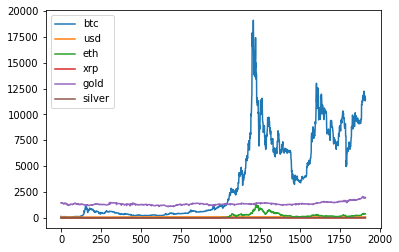

In [ ]:
plt.figure(); currencies.plot(); plt.legend(loc='best')

In [ ]:
test

,ds,open,high,low,diff,y,volume,market cap,S2F
2279,7/25/2019,9809.10,10154.25,9773.96,99.91,9911.84,15821952090,1.768060e+11,14.848478
2280,7/26/2019,9913.13,9916.52,9717.98,-41.54,9870.30,14495714483,1.760860e+11,32.208374
2281,7/27/2019,9871.16,10167.32,9411.52,-392.62,9477.68,16817809536,1.691000e+11,31.529721
2282,7/28/2019,9491.63,9575.55,9252.30,75.18,9552.86,13738687093,1.704620e+11,22.127246
2283,7/29/2019,9548.18,9681.65,9472.95,-33.71,9519.15,13791445323,1.698800e+11,20.090378
...,...,...,...,...,...,...,...,...,...
2677,8/26/2020,11366.89,11530.05,11296.99,122.22,11488.36,22466660958,2.122110e+11,31.093564
2678,8/27/2020,11485.61,11570.79,11185.94,-164.96,11323.40,23240415076,2.091720e+11,46.764867
2679,8/28/2020,11325.30,11545.62,11316.42,219.10,11542.50,19807127588,2.132320e+11,52.396465
2680,8/29/2020,11541.05,11585.64,11466.29,-35.63,11506.87,17485597759,2.125840e+11,3.828725


In [ ]:
data['yhat'] = prediction['yhat']

In [ ]:
data

,ds,open,high,low,diff,y,volume,market cap,S2F,yhat_lower_results,yhat_upper_results,yhat,results
0,4/28/2013,135.30,135.98,132.10,0.00,134.21,0,1.488567e+09,6.864391,123.105764,147.763797,135.503185,-1.293185
1,4/29/2013,134.44,147.49,134.00,10.33,144.54,0,1.603769e+09,6.985530,131.990866,155.462073,143.742644,0.797356
2,4/30/2013,144.00,146.93,134.05,-5.54,139.00,0,1.542813e+09,8.160798,126.545838,148.932607,138.310246,0.689754
3,5/1/2013,139.00,139.89,107.72,-22.01,116.99,0,1.298955e+09,8.055411,106.910356,130.137734,118.267213,-1.277213
4,5/2/2013,116.38,125.60,92.28,-11.78,105.21,0,1.168517e+09,9.080454,95.267053,118.163646,107.187973,-1.977973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,8/26/2020,11366.89,11530.05,11296.99,122.22,11488.36,22466660958,2.122110e+11,31.093564,11355.149410,11730.359520,11535.369670,-47.009669
2678,8/27/2020,11485.61,11570.79,11185.94,-164.96,11323.40,23240415076,2.091720e+11,46.764867,11191.160210,11565.367570,11368.159180,-44.759184
2679,8/28/2020,11325.30,11545.62,11316.42,219.10,11542.50,19807127588,2.132320e+11,52.396465,11418.132250,11792.008800,11596.399510,-53.899513
2680,8/29/2020,11541.05,11585.64,11466.29,-35.63,11506.87,17485597759,2.125840e+11,3.828725,11370.168630,11749.257690,11550.817760,-43.947760


In [ ]:
data = pd.read_csv('Prophet_Bitcoin_Predictions.csv')

In [ ]:
data.to_csv('Prophet_Bitcoin_Predictions.csv')

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,S2F,S2F_lower,S2F_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,diff,diff_lower,diff_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,high,high_lower,high_upper,low,low_lower,low_upper,market cap,market cap_lower,market cap_upper,open,open_lower,open_upper,volume,volume_lower,volume_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,639.227429,123.105764,147.763797,639.227429,639.227429,-1.544562,-1.544562,-1.544562,-503.724244,-503.724244,-503.724244,2020.223422,2020.223422,2020.223422,-3.575809,-3.575809,-3.575809,-2526.634634,-2526.634634,-2526.634634,-8.262115,-8.262115,-8.262115,11.768927,11.768927,11.768927,-402.376677,-402.376677,-402.376677,-2124.354902,-2124.354902,-2124.354902,1.710504,1.710504,1.710504,0.689139,0.689139,0.689139,1.997829,1.997829,1.997829,0.0,0.0,0.0,135.503185
1,2013-04-29,639.415189,131.990865,155.462073,639.415189,639.415189,-1.526040,-1.526040,-1.526040,-495.672545,-495.672545,-495.672545,2020.223422,2020.223422,2020.223422,5.122722,5.122722,5.122722,-2517.542108,-2517.542108,-2517.542108,-8.225504,-8.225504,-8.225504,11.759754,11.759754,11.759754,-401.303429,-401.303429,-401.303429,-2125.080115,-2125.080115,-2125.080115,1.710504,1.710504,1.710504,-0.343942,-0.343942,-0.343942,1.990083,1.990083,1.990083,0.0,0.0,0.0,143.742644
2,2013-04-30,639.602950,126.545838,148.932607,639.602950,639.602950,-1.346339,-1.346339,-1.346339,-501.292703,-501.292703,-501.292703,2020.223422,2020.223422,2020.223422,-8.240850,-8.240850,-8.240850,-2523.234203,-2523.234203,-2523.234203,-8.227286,-8.227286,-8.227286,11.759512,11.759512,11.759512,-401.871306,-401.871306,-401.871306,-2117.018439,-2117.018439,-2117.018439,1.710504,1.710504,1.710504,-0.241912,-0.241912,-0.241912,1.959989,1.959989,1.959989,0.0,0.0,0.0,138.310246
3,2013-05-01,639.790710,106.910356,130.137735,639.790710,639.790710,-1.362453,-1.362453,-1.362453,-521.523498,-521.523498,-521.523498,2020.223422,2020.223422,2020.223422,-22.109661,-22.109661,-22.109661,-2543.502601,-2543.502601,-2543.502601,-8.249678,-8.249678,-8.249678,11.886628,11.886628,11.886628,-404.143145,-404.143145,-404.143145,-2121.234797,-2121.234797,-2121.234797,1.710504,1.710504,1.710504,-0.148809,-0.148809,-0.148809,1.904491,1.904491,1.904491,0.0,0.0,0.0,118.267213
4,2013-05-02,639.978471,95.267053,118.163646,639.978471,639.978471,-1.205722,-1.205722,-1.205722,-532.790498,-532.790498,-532.790498,2020.223422,2020.223422,2020.223422,-13.495336,-13.495336,-13.495336,-2554.992441,-2554.992441,-2554.992441,-8.295130,-8.295130,-8.295130,11.961170,11.961170,11.961170,-405.358326,-405.358326,-405.358326,-2140.309601,-2140.309601,-2140.309601,1.710504,1.710504,1.710504,0.157363,0.157363,0.157363,1.821158,1.821158,1.821158,0.0,0.0,0.0,107.187973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,2020-08-26,539.769436,11355.149406,11730.359520,360.122437,734.837387,2.160120,2.160120,2.160120,10995.600233,10995.600233,10995.600233,2020.223422,2020.223422,2020.223422,99.341381,99.341381,99.341381,8982.656884,8982.656884,8982.656884,27.979245,27.979245,27.979245,-42.133008,-42.133008,-42.133008,1560.759485,1560.759485,1560.759485,7346.926127,7346.926127,7346.926127,-12.376465,-12.376465,-12.376465,-0.148809,-0.148809,-0.148809,-7.131264,-7.131264,-7.131264,0.0,0.0,0.0,11535.369669
2678,2020-08-27,539.653304,11191.160208,11565.367568,359.210227,735.211289,4.556290,4.556290,4.556290,10828.505881,10828.505881,10828.505881,2020.223422,2020.223422,2020.223422,-142.482860,-142.482860,-142.482860,8815.210586,8815.210586,8815.210586,28.108827,28.108827,28.108827,-41.596880,-41.596880,-41.596880,1532.447498,1532.

In [ ]:
test_results

,ds,yhat_lower_res,yhat_upper_res
2279,7/25/2019,NaN,NaN
2280,7/26/2019,NaN,NaN
2281,7/27/2019,NaN,NaN
2282,7/28/2019,NaN,NaN
2283,7/29/2019,NaN,NaN
...,...,...,...
2677,8/26/2020,NaN,NaN
2678,8/27/2020,NaN,NaN
2679,8/28/2020,NaN,NaN
2680,8/29/2020,NaN,NaN


In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,S2F,S2F_lower,S2F_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,diff,diff_lower,diff_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,high,high_lower,high_upper,low,low_lower,low_upper,market cap,market cap_lower,market cap_upper,open,open_lower,open_upper,volume,volume_lower,volume_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-25,585.990064,9906.450758,9930.265044,585.990064,585.990064,-0.323781,-0.323781,-0.323781,9332.832802,9332.832802,9332.832802,2020.223422,2020.223422,2020.223422,80.554909,80.554909,80.554909,7325.048921,7325.048921,7325.048921,23.603209,23.603209,23.603209,-34.780113,-34.780113,-34.780113,1230.918780,1230.918780,1230.918780,6033.286039,6033.286039,6033.286039,-8.210123,-8.210123,-8.210123,0.157363,0.157363,0.157363,-12.596904,-12.596904,-12.596904,0.0,0.0,0.0,9918.822866
1,2019-07-26,585.873932,9871.999936,9894.582174,585.873932,585.873932,2.330577,2.330577,2.330577,9297.893891,9297.893891,9297.893891,2020.223422,2020.223422,2020.223422,-38.555191,-38.555191,-38.555191,7289.956728,7289.956728,7289.956728,22.847056,22.847056,22.847056,-34.509853,-34.509853,-34.509853,1224.211103,1224.211103,1224.211103,6121.011585,6121.011585,6121.011585,-7.378550,-7.378550,-7.378550,0.119458,0.119458,0.119458,-12.405717,-12.405717,-12.405717,0.0,0.0,0.0,9883.767823
2,2019-07-27,585.757800,9476.457807,9499.829827,585.757800,585.757800,2.226809,2.226809,2.226809,8902.350599,8902.350599,8902.350599,2020.223422,2020.223422,2020.223422,-334.187388,-334.187388,-334.187388,6894.566816,6894.566816,6894.566816,23.644781,23.644781,23.644781,-33.030323,-33.030323,-33.030323,1159.128003,1159.128003,1159.128003,6085.619476,6085.619476,6085.619476,-8.834542,-8.834542,-8.834542,-0.231298,-0.231298,-0.231298,-12.208342,-12.208342,-12.208342,0.0,0.0,0.0,9488.108398
3,2019-07-28,585.641668,9563.016097,9586.389253,585.641668,585.641668,0.789155,0.789155,0.789155,8989.413850,8989.413850,8989.413850,2020.223422,2020.223422,2020.223422,59.730641,59.730641,59.730641,6980.506093,6980.506093,6980.506093,21.762525,21.762525,21.762525,-32.261639,-32.261639,-32.261639,1171.816692,1171.816692,1171.816692,5765.572600,5765.572600,5765.572600,-6.903881,-6.903881,-6.903881,0.689139,0.689139,0.689139,-12.004803,-12.004803,-12.004803,0.0,0.0,0.0,9575.055518
4,2019-07-29,585.525535,9512.639759,9535.702271,585.525535,585.525535,0.477714,0.477714,0.477714,8938.090567,8938.090567,8938.090567,2020.223422,2020.223422,2020.223422,-31.961822,-31.961822,-31.961822,6930.006299,6930.006299,6930.006299,22.100000,22.100000,22.100000,-33.326895,-33.326895,-33.326895,1166.394653,1166.394653,1166.394653,5813.259610,5813.259610,5813.259610,-6.936961,-6.936961,-6.936961,-0.343942,-0.343942,-0.343942,-11.795212,-11.795212,-11.795212,0.0,0.0,0.0,9523.616102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,2020-08-26,539.769436,11363.482019,11751.452973,371.923760,751.664344,2.160120,2.160120,2.160120,10995.600233,10995.600233,10995.600233,2020.223422,2020.223422,2020.223422,99.341381,99.341381,99.341381,8982.656884,8982.656884,8982.656884,27.979245,27.979245,27.979245,-42.133008,-42.133008,-42.133008,1560.759485,1560.759485,1560.759485,7346.926127,7346.926127,7346.926127,-12.376465,-12.376465,-12.376465,-0.148809,-0.148809,-0.148809,-7.131264,-7.131264,-7.131264,0.0,0.0,0.0,11535.369669
399,2020-08-27,539.653304,11198.114030,11586.172162,371.188388,752.353601,4.556290,4.556290,4.556290,10828.505881,10828.505881,10828.505881,2020.223422,2020.223422,2020.223422,-142.482860,-142.482860,-142.482860,8815.210586,8815.210586,8815.210586,28.108827,28.108827,28.108827,-41.596880,-

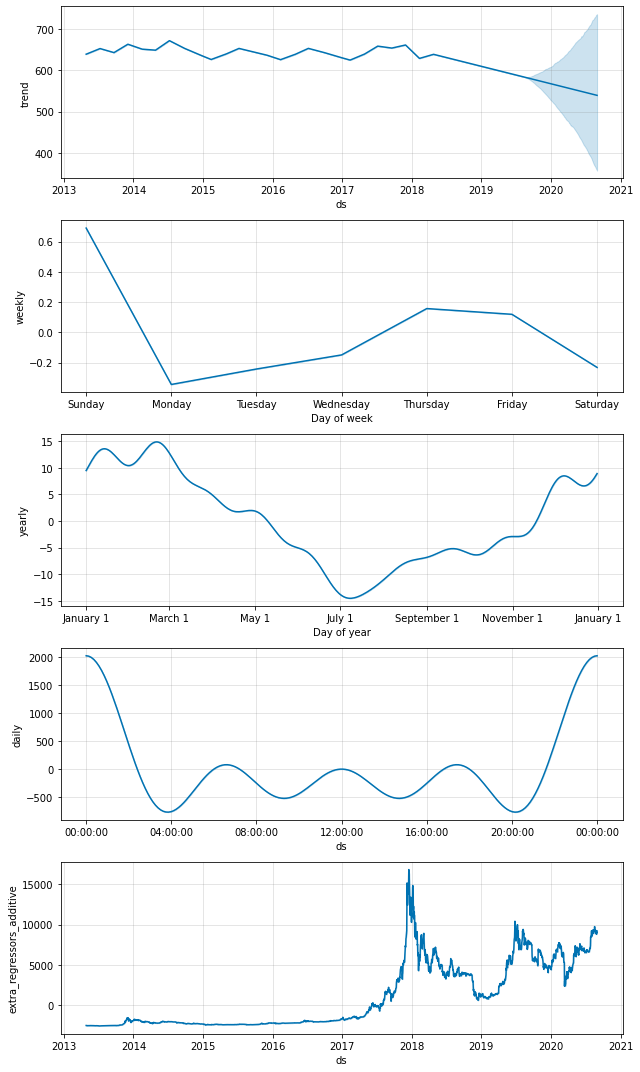

In [ ]:
fig2 = m.plot_components(prediction)

In [ ]:
!pip install plotly

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m,prediction)

In [ ]:
plot_components_plotly(m, prediction)

#Prophet V2 with S2F Model from PlanB


In [ ]:
!git clone https://github.com/MarcelBurger/Bitcoin-Data-Analysis.git

Cloning into 'Bitcoin-Data-Analysis'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas_profiling as pp
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
block_data = pd.read_csv('bitcoindataset.csv')

In [ ]:
block_data

,timestamp,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving
0,2010-10-13,84963.0,0.105000,1.378028e+03,4248150.0,-2.253795,NaN,NaN,NaN,NaN,125037.0,84963.0
1,2010-10-14,85168.0,0.102000,1.378028e+03,4258400.0,-2.282782,-0.028571,-0.028988,NaN,1.135489,124832.0,85168.0
2,2010-10-15,85345.0,0.105000,1.378028e+03,4267250.0,-2.253795,0.029412,0.028988,NaN,1.318288,124655.0,85345.0
3,2010-10-16,85603.0,0.101000,1.378028e+03,4280150.0,-2.292635,-0.038095,-0.038840,NaN,0.906287,124397.0,85603.0
4,2010-10-17,85873.0,0.102000,1.378028e+03,4293650.0,-2.282782,0.009901,0.009852,NaN,0.868625,124127.0,85873.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2019-07-19,586116.0,10538.535590,9.064160e+12,17826450.0,9.262794,-0.010265,-0.010318,1.311793,33.108846,43884.0,43884.0
3196,2019-07-20,586293.0,10761.187378,9.064160e+12,17828662.5,9.283701,0.021127,0.020907,1.310733,22.074391,43707.0,43707.0
3197,2019-07-21,586442.0,10591.299465,9.064160e+12,17830525.0,9.267788,-0.015787,-0.015913,1.290440,26.225853,43558.0,43558.0
3198,2019-07-22,586600.0,10327.950395,9.064160e+12,17832500.0,9.242609,-0.024865,-0.025179,1.285901,24.734559,43400.0,43400.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import pandas_profiling as pp


df_fullset = pd.read_csv("bitcoindataset.csv")
df_model=pd.DataFrame()

df_model['ret']=df_fullset['Ret']
df_model['y'] = data['y']
df_model['ds']=df_fullset['timestamp']

In [ ]:
df_model

,ret,y,ds
0,0.041270,134.21,4/28/2013
1,0.068462,144.54,4/29/2013
2,-0.024123,139.00,4/30/2013
3,-0.163140,116.99,5/1/2013
4,-0.075523,105.21,5/2/2013
...,...,...,...
2273,-0.010265,10530.73,7/19/2019
2274,0.021127,10767.14,7/20/2019
2275,-0.015787,10599.11,7/21/2019
2276,-0.024865,10343.11,7/22/2019


In [ ]:
m = Prophet(daily_seasonality=True)
m.add_regressor('ret')
m.fit(df_model)

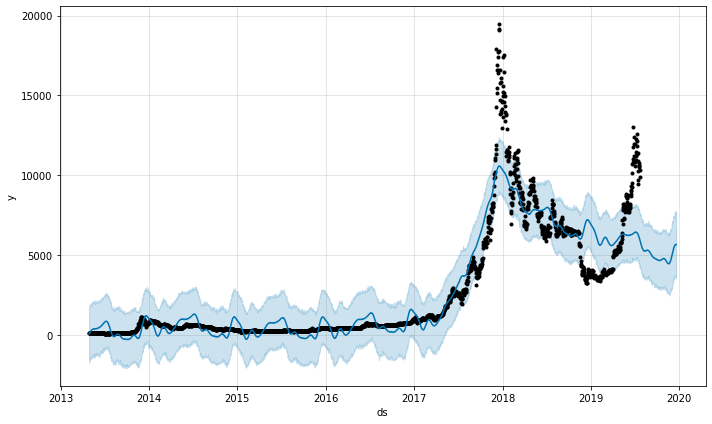

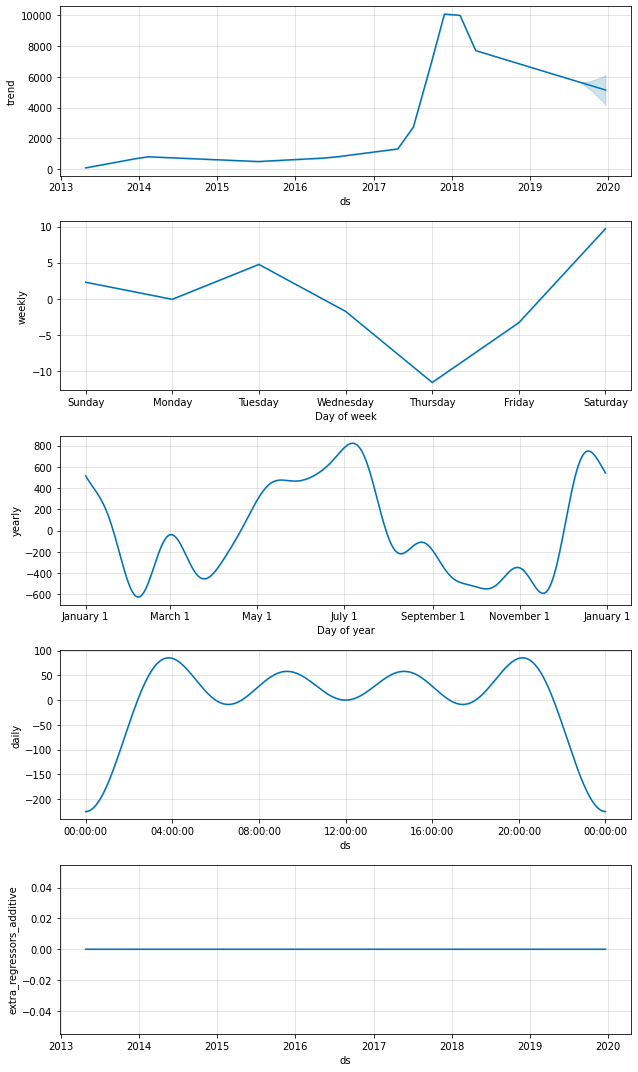

In [ ]:
future = m.make_future_dataframe(periods=150)
future['ret'] = df_model['ret'].mean()
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
plt.show()

In [ ]:
del m

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



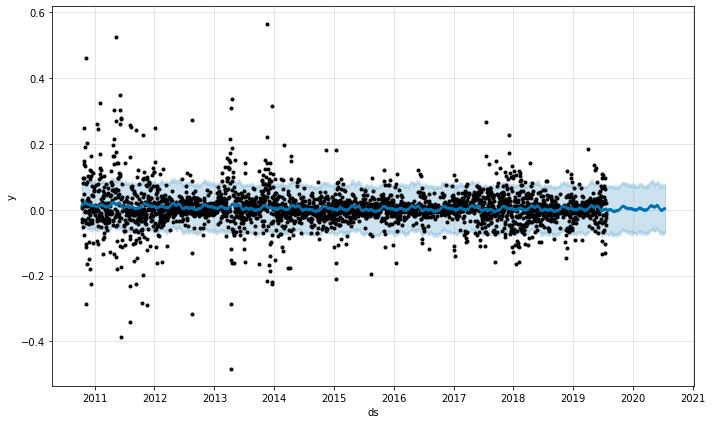

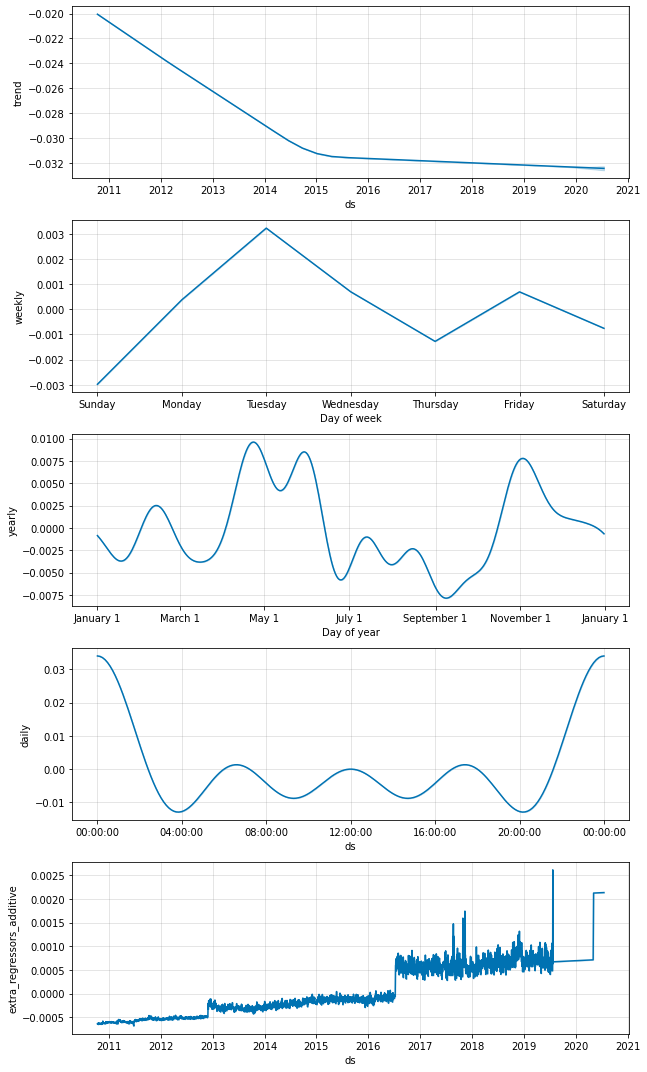

In [ ]:
df_fullset = pd.read_csv("bitcoindataset.csv")
df_model=pd.DataFrame()
df_model['y']=df_fullset['Ret']
df_model['ds']=df_fullset['timestamp']

#Adding Regressors
m = Prophet(daily_seasonality=True)
df_model['S2F'] = df_fullset['S2F']
df_model['S2F']= df_model['S2F'].fillna(method='bfill')
df_model['S2F']= pd.to_numeric(df_model['S2F'], errors='coerce')
m.add_regressor('S2F')


#Creating future data for S2F
prediction_interval = 360
blocks_per_day = 1440/9.45
last_blockheight = df_fullset['blockheight'].tail(1).values[0]
df_futuredata = pd.DataFrame(index=range(prediction_interval),columns=range(1))
df_futuredata['blocksperday'] = pd.to_numeric(blocks_per_day)
df_futuredata['blockheight'] = pd.to_numeric(last_blockheight) + df_futuredata['blocksperday'].cumsum(axis=0)
df_futuredata['supply']=df_futuredata['blockheight'].apply(lambda x: 50*(210000*(1-math.pow(0.5, math.floor(x/210000)))/(1-0.5)+math.pow(0.5, math.floor(x/210000))*math.fmod(x,210000)))
df_futuredata['S2F']=df_futuredata['supply'].shift(1)/(365*(df_futuredata['supply'] - df_futuredata['supply'].shift(1)))
df_futuredata['S2F']= df_futuredata['S2F'].fillna(method='bfill')

# Prepare model and future time series
m.fit(df_model)

future = m.make_future_dataframe(periods=prediction_interval, freq='D')
len_future=len(future.index)
len_dfmodel=len(df_model.index)
future['S2F'] = np.nan

for i in range(0, len_dfmodel):
    future['S2F'].iloc[i]=df_model['S2F'].iloc[i]

for i in range(0, len_future-len_dfmodel-1):
    future['S2F'].iloc[len_dfmodel + i]=df_futuredata['S2F'].iloc[i]


future['S2F'].bfill(inplace=True)
future['S2F'].ffill(inplace=True)
future['S2F'] = future['S2F'].astype(float)

# Needed to solve an issue with dataformat
pd.plotting.register_matplotlib_converters()

#Forecast with Prophet
forecast = m.predict(future)

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


plt.show()

In [ ]:
forecast

NameError: ignored

Level Price
0  13504
0.236 13496.212
0.382 13491.394
0.618 13483.606
1  13471


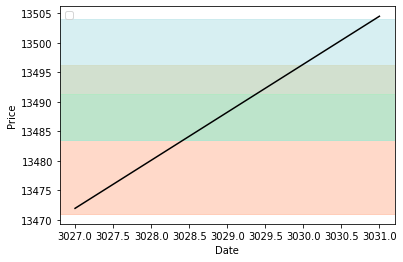

In [ ]:
import matplotlib.pyplot as plt

fibs = prediction['trend'].tail()

price_min = fibs.min()
price_max = fibs.max()

price_min = int(price_min)
price_min

price_max = int(price_max)
price_max


diff = price_max - price_min

level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

print("Level", "Price")
print("0 ", price_max)
print("0.236", level1)
print("0.382", level2)
print("0.618", level3)
print("1 ", price_min)



fig, ax = plt.subplots()
ax.plot(prediction['trend'].tail(), color='black')
ax.axhspan(level1, price_min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(price_max, level3, alpha=0.5, color='powderblue')

plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2)
plt.show()

#Forecasting multiple time series

In [ ]:
import pandas as pd
import numpy as np
def rnd_timeserie(min_date, max_date):
    time_index = pd.date_range(min_date, max_date)
    dates = (pd.DataFrame({'ds': pd.to_datetime(time_index.values)},
                          index=range(len(time_index))))
    y = np.random.random_sample(len(dates))*10
    dates['y'] = y
    return dates

In [ ]:
series = [rnd_timeserie('2018-01-01','2018-12-30') for x in range(0,500)]

In [ ]:
from fbprophet import Prophet
def run_prophet(timeserie):
    model = Prophet(yearly_seasonality=False,daily_seasonality=False)
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=90, include_history=False)
    forecast = model.predict(forecast)
    return forecast

In [ ]:
f = run_prophet(series[0])
f.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-31,4.982661,0.650172,7.744924,4.982661,4.982661,-0.742977,-0.742977,-0.742977,-0.742977,-0.742977,-0.742977,0.0,0.0,0.0,4.239684
1,2019-01-01,4.981803,0.838174,7.889256,4.981803,4.981803,-0.579514,-0.579514,-0.579514,-0.579514,-0.579514,-0.579514,0.0,0.0,0.0,4.402289
2,2019-01-02,4.980945,1.910541,8.888108,4.980943,4.980945,0.416199,0.416199,0.416199,0.416199,0.416199,0.416199,0.0,0.0,0.0,5.397143
3,2019-01-03,4.980086,1.420746,8.218845,4.980078,4.980088,-0.107707,-0.107707,-0.107707,-0.107707,-0.107707,-0.107707,0.0,0.0,0.0,4.872379
4,2019-01-04,4.979228,2.127617,9.087555,4.979207,4.979242,0.575330,0.575330,0.575330,0.575330,0.575330,0.575330,0.0,0.0,0.0,5.554559


In [ ]:
series[0]

,ds,y
0,2018-01-01,1.335315
1,2018-01-02,1.586529
2,2018-01-03,7.865294
3,2018-01-04,3.343343
4,2018-01-05,9.652490
...,...,...
359,2018-12-26,0.975171
360,2018-12-27,0.312300
361,2018-12-28,3.080351
362,2018-12-29,8.907271


In [ ]:
series[1]

,ds,y
0,2018-01-01,8.574371
1,2018-01-02,6.535238
2,2018-01-03,0.920229
3,2018-01-04,3.482067
4,2018-01-05,2.573332
...,...,...
359,2018-12-26,0.731425
360,2018-12-27,1.476263
361,2018-12-28,0.046463
362,2018-12-29,9.622948


In [ ]:
import time
start_time = time.time()
result = list(map(lambda timeserie: run_prophet(timeserie), tqdm(series)))
print("--- %s seconds ---" % (time.time() - start_time))

NameError: ignored